In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier
from sklearn.feature_selection import SelectKBest,chi2
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

In [73]:
train=pd.read_csv("E:\\titanic-comp\\train.csv")
test=pd.read_csv("E:\\titanic-comp\\test.csv")

In [74]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
#imputaion
train[train.select_dtypes('object').columns]=train.select_dtypes('object').astype('category')


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [79]:
train=train.drop(columns=['Name','Ticket','PassengerId'],axis=1)

In [80]:
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [81]:
from sklearn.impute import SimpleImputer

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
lb=LabelEncoder()
train['Embarked'] = lb.fit_transform(train['Embarked'])
train['Sex'] = lb.fit_transform(train['Sex'])

In [87]:
relevant_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [88]:
imputer = SimpleImputer(strategy='mean')
train[relevant_features] = imputer.fit_transform(train[relevant_features])
test[relevant_features] = imputer.transform(test[relevant_features])

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    float64 
 2   Sex       891 non-null    int32   
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    float64 
 5   Parch     891 non-null    float64 
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    category
 8   Embarked  891 non-null    float64 
dtypes: category(1), float64(6), int32(1), int64(1)
memory usage: 59.3 KB


In [90]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [91]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3.0,1,22.000000,1.0,0.0,7.2500,NaN,2.0
1,1,1.0,0,38.000000,1.0,0.0,71.2833,C85,0.0
2,1,3.0,0,26.000000,0.0,0.0,7.9250,NaN,2.0
3,1,1.0,0,35.000000,1.0,0.0,53.1000,C123,2.0
4,0,3.0,1,35.000000,0.0,0.0,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2.0,1,27.000000,0.0,0.0,13.0000,NaN,2.0
887,1,1.0,0,19.000000,0.0,0.0,30.0000,B42,2.0
888,0,3.0,0,29.699118,1.0,2.0,23.4500,NaN,2.0
889,1,1.0,1,26.000000,0.0,0.0,30.0000,C148,0.0


In [92]:
train=train.drop(columns=['Cabin'],axis=1)

In [93]:
# Data visualization

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

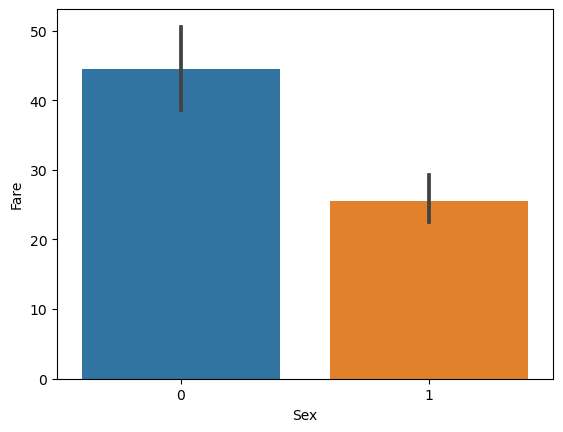

In [94]:
sns.barplot(x=train.Sex,y=train.Fare)

In [95]:
# check for imbalance of data

<AxesSubplot:xlabel='Survived', ylabel='count'>

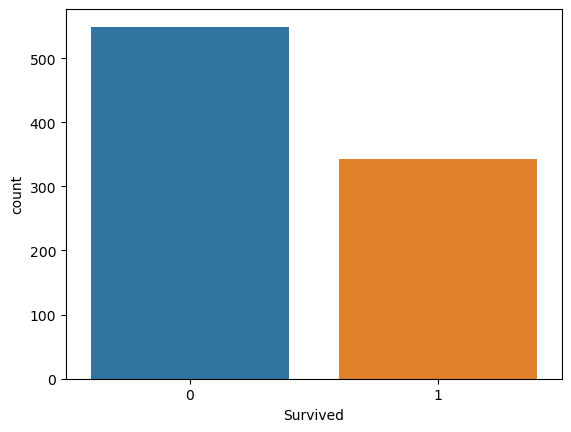

In [96]:
sns.countplot(x=train.Survived)

In [97]:
#train[train.select_dtypes('object').columns]=train.select_dtypes('object').astype()

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 52.3 KB


<AxesSubplot:>

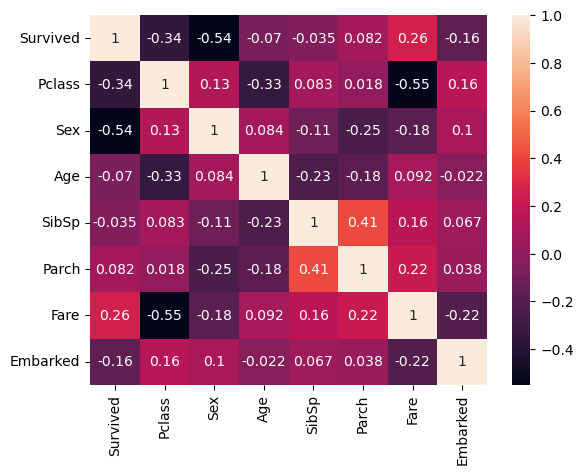

In [100]:
sns.heatmap(train.corr(),annot=True)

In [101]:
train[train.select_dtypes('object').columns]=train.select_dtypes('object').astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    float64
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    float64
 6   Parch        418 non-null    float64
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 36.0+ KB


In [102]:
lb=LabelEncoder()
test['Embarked'] = lb.fit_transform(test['Embarked'])
test['Sex'] = lb.fit_transform(test['Sex'])

In [ ]:
relevant_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 52.3 KB


In [105]:
test=test.drop(columns=['Cabin','Name','Ticket','PassengerId'],axis=1)

In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    float64
 4   Parch     418 non-null    float64
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(5), int32(2)
memory usage: 19.7 KB


In [107]:
x=train.drop(columns=['Survived'],axis=1)

In [113]:
y_train=train.Survived

In [ ]:
# fEature scaling

In [111]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x)
x_test=scaler.fit_transform(test)

In [112]:
# logistic regression

In [114]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [115]:
logit_model.score(x_train,y_train)

0.8013468013468014

In [116]:
pred=logit_model.predict(x_train)

In [118]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold

In [121]:
print((cross_val_score(logit_model,x_train,y_train)).mean())

0.7845207457158998


In [122]:
print(metrics.classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [ ]:
# decision tree

In [125]:
dt_model=DecisionTreeClassifier()

In [182]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [124]:
param={'criterion':['gini','entropy'],'max_depth':range(2,20),'max_leaf_nodes':range(2,20)}

In [126]:
grid=GridSearchCV(dt_model,param_grid=param,cv=5)

In [127]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_leaf_nodes': range(2, 20)})

In [128]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 13, 'max_leaf_nodes': 16}

In [129]:
dt_model1=DecisionTreeClassifier(criterion='gini',max_depth=13,max_leaf_nodes=16)

In [130]:
dt_model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=16)

In [131]:
dt_model1.score(x_train,y_train)

0.8518518518518519

In [132]:
pred=dt_model1.predict(x_train)

In [134]:
print((cross_val_score(dt_model1,x_train,y_train)).mean())

0.8226727763480008


In [135]:
print(metrics.classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       549
           1       0.85      0.74      0.79       342

    accuracy                           0.85       891
   macro avg       0.85      0.83      0.84       891
weighted avg       0.85      0.85      0.85       891



In [ ]:
# KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
knn_model=KNeighborsClassifier()

In [140]:
param1={'n_neighbors':range(1,15)}

In [141]:
grid2=GridSearchCV(knn_model,param_grid=param1,cv=5)

In [142]:
grid2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)})

In [143]:
grid2.best_params_

{'n_neighbors': 14}

In [144]:
knn_model1=KNeighborsClassifier(n_neighbors=14)

In [145]:
knn_model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [146]:
knn_model1.score(x_train,y_train)

0.8271604938271605

In [147]:
pred=knn_model1.predict(x_train)

In [149]:
print((cross_val_score(knn_model1,x_train,y_train,cv=5)).mean())

0.8136902893729208


In [150]:
print(metrics.classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       549
           1       0.84      0.68      0.75       342

    accuracy                           0.83       891
   macro avg       0.83      0.80      0.81       891
weighted avg       0.83      0.83      0.82       891



In [ ]:
# SVM

In [151]:
from sklearn.svm import SVC # "Support vector classifier"  
svm_model=SVC()
param_grid=[{'kernel':['linear','rbf','poly','sigmoid'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
grid3=RandomizedSearchCV(svm_model,param_grid,verbose=300)
grid3.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.001, gamma=0.01, kernel=sigmoid........................
[CV 1/5; 1/10] END C=0.001, gamma=0.01, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 2/5; 1/10] START C=0.001, gamma=0.01, kernel=sigmoid........................
[CV 2/5; 1/10] END C=0.001, gamma=0.01, kernel=sigmoid;, score=0.618 total time=   0.0s
[CV 3/5; 1/10] START C=0.001, gamma=0.01, kernel=sigmoid........................
[CV 3/5; 1/10] END C=0.001, gamma=0.01, kernel=sigmoid;, score=0.618 total time=   0.0s
[CV 4/5; 1/10] START C=0.001, gamma=0.01, kernel=sigmoid........................
[CV 4/5; 1/10] END C=0.001, gamma=0.01, kernel=sigmoid;, score=0.618 total time=   0.0s
[CV 5/5; 1/10] START C=0.001, gamma=0.01, kernel=sigmoid........................
[CV 5/5; 1/10] END C=0.001, gamma=0.01, kernel=sigmoid;, score=0.612 total time=   0.0s
[CV 1/5; 2/10] START C=10, gamma=0.01, kernel=linear............................
[CV 1/5; 2/10

RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf', 'poly',
                                                    'sigmoid']}],
                   verbose=300)

In [152]:
grid3.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 10}

In [153]:
svm_model1=SVC(kernel='linear',gamma=0.01,C=10)

In [154]:
svm_model1.fit(x_train,y_train)

SVC(C=10, gamma=0.01, kernel='linear')

In [155]:
svm_model1.score(x_train,y_train)

0.7867564534231201

In [156]:
pred=svm_model1.predict(x_train)

In [158]:
print((cross_val_score(svm_model1,x_train,y_train,cv=5)).mean())

0.7878601468834348


In [159]:
print(metrics.classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



In [160]:
from sklearn.naive_bayes import GaussianNB

In [161]:
naive_model=GaussianNB()
naive_model.fit(x_train,y_train)

GaussianNB()

In [162]:
pred=naive_model.predict(x_train)

In [163]:
naive_model.score(x_train,y_train)

0.792368125701459

In [167]:
print((cross_val_score(naive_model,x_train,y_train,cv=5)).mean())

0.7912685958194715


In [168]:
from sklearn.ensemble import VotingClassifier

In [169]:
ensemble=[]
ensemble.append(('lr',logit_model))
ensemble.append(('dt',dt_model1))
ensemble.append(('knn',knn_model1))
ensemble.append(('SVC',svm_model1))
ensemble.append(('Naive',naive_model))

In [171]:
voting=VotingClassifier(estimators=ensemble)

In [172]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=13,
                                                     max_leaf_nodes=16)),
                             ('knn', KNeighborsClassifier(n_neighbors=14)),
                             ('SVC', SVC(C=10, gamma=0.01, kernel='linear')),
                             ('Naive', GaussianNB())])

In [173]:
voting.score(x_train,y_train)

0.8125701459034792

In [174]:
pred=voting.predict(x_train)

In [175]:
print((cross_val_score(voting,x_train,y_train,cv=5)).mean())

0.8024606113866046


In [176]:
print(metrics.classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       549
           1       0.79      0.69      0.74       342

    accuracy                           0.81       891
   macro avg       0.81      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



In [ ]:
# Random forest

In [177]:
rand_model=RandomForestClassifier()

In [179]:
param={'criterion':['gini','entropy'],'max_depth':range(2,20),'max_leaf_nodes':range(2,20)}

In [184]:
grid4=RandomizedSearchCV(rand_model,param,cv=5)

In [185]:
grid4.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_leaf_nodes': range(2, 20)})

In [198]:
grid4.best_params_

{'max_leaf_nodes': 16, 'max_depth': 17, 'criterion': 'gini'}

In [186]:
grid4.score(x_train,y_train)

0.8552188552188552

In [187]:
pred=grid4.predict(x_train)

In [254]:
rand_model1=RandomForestClassifier(criterion='gini',max_depth=17,max_leaf_nodes=16,n_estimators=100)

In [255]:
rand_model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=17, max_leaf_nodes=16)

In [256]:
pred=rand_model1.predict(x_train)

In [257]:
print((cross_val_score(rand_model1,x_train,y_train,cv=5)).mean())

0.8159688657334756


In [203]:
print(metrics.classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       549
           1       0.90      0.70      0.79       342

    accuracy                           0.86       891
   macro avg       0.87      0.83      0.84       891
weighted avg       0.86      0.86      0.85       891



In [190]:
grad_model=GradientBoostingClassifier()
grad_model.fit(x_train,y_train)
pred=grad_model.predict(x_train)

In [191]:
grad_model.score(x_train,y_train)

0.8933782267115601

In [192]:
print((cross_val_score(voting,x_train,y_train,cv=5)).mean())
print(metrics.classification_report(y_train,pred))

0.8024606113866046
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.90      0.81      0.85       342

    accuracy                           0.89       891
   macro avg       0.90      0.88      0.88       891
weighted avg       0.89      0.89      0.89       891



In [ ]:
# Xgboost

In [193]:
xgr=xg.XGBRFClassifier()
xgr.fit(x_train,y_train)
pred=xgr.predict(x_train)

In [194]:
print((cross_val_score(xgr,x_train,y_train,cv=5)).mean())
print(metrics.classification_report(y_train,pred))

0.8249450756386919
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       549
           1       0.91      0.75      0.82       342

    accuracy                           0.88       891
   macro avg       0.89      0.85      0.86       891
weighted avg       0.88      0.88      0.87       891



In [212]:
ada_model=AdaBoostClassifier()
ada_model.fit(x_train,y_train)
pred=xgr.predict(x_train)

In [213]:
print((cross_val_score(ada_model,x_train,y_train,cv=5)).mean())
print(metrics.classification_report(y_train,pred))

0.8025233820852427
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       549
           1       0.91      0.75      0.82       342

    accuracy                           0.88       891
   macro avg       0.89      0.85      0.86       891
weighted avg       0.88      0.88      0.87       891



In [217]:
ensemble.append(('ada',ada_model))
ensemble.append(('rf',rand_model1))
ensemble.append(('gd',grad_model))
ensemble.append(('xg',xgr))

In [227]:
ensemble.remove(('ada',xgr))

In [228]:
ensemble

[('lr', LogisticRegression()),
 ('dt', DecisionTreeClassifier(max_depth=13, max_leaf_nodes=16)),
 ('knn', KNeighborsClassifier(n_neighbors=14)),
 ('SVC', SVC(C=10, gamma=0.01, kernel='linear')),
 ('Naive', GaussianNB()),
 ('ada', AdaBoostClassifier()),
 ('rf', RandomForestClassifier(max_depth=17, max_leaf_nodes=16)),
 ('gd', GradientBoostingClassifier()),
 ('xg',
  XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                  colsample_bylevel=1, colsample_bytree=1,
                  early_stopping_rounds=None, enable_categorical=False,
                  eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                  grow_policy='depthwise', importance_type=None,
                  interaction_constraints='', max_bin=256, max_cat_threshold=64,
                  max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                  max_leaves=0, min_child_weight=1, missing=nan,
                  monotone_constraints='()', n_estimators=100, n_jobs=0,
     

In [229]:
voting1=VotingClassifier(estimators=ensemble)
voting1.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=13,
                                                     max_leaf_nodes=16)),
                             ('knn', KNeighborsClassifier(n_neighbors=14)),
                             ('SVC', SVC(C=10, gamma=0.01, kernel='linear')),
                             ('Naive', GaussianNB()),
                             ('ada', AdaBoostClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=17,
                                                     max_leaf_nodes=16)),
                             ('gd', GradientBoostingClass...
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                             

In [231]:
voting1.score(x_train,y_train)

0.8462401795735129

In [232]:
pred=voting1.predict(x_train)

In [233]:
print((cross_val_score(voting1,x_train,y_train,cv=5)).mean())
print(metrics.classification_report(y_train,pred))

0.8170610758897746
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       549
           1       0.85      0.73      0.79       342

    accuracy                           0.85       891
   macro avg       0.85      0.83      0.83       891
weighted avg       0.85      0.85      0.84       891



In [253]:
answer = pd.read_csv("E:\\titanic-comp\\gender_submission.csv")
answer['Survived'] = cat_model.predict(x_test)
answer.to_csv('submissionTT8.csv', index=False)

In [236]:
!pip install catboost

     ---------------------------------------- 74.0/74.0 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [241]:
from catboost import CatBoostRegressor,CatBoostClassifier

In [242]:
cat_model=CatBoostClassifier()
cat_model.fit(x_train,y_train)

Learning rate set to 0.009807
0:	learn: 0.6863480	total: 2.49ms	remaining: 2.48s
1:	learn: 0.6791088	total: 4.96ms	remaining: 2.47s
2:	learn: 0.6730850	total: 7.42ms	remaining: 2.46s
3:	learn: 0.6670438	total: 9.95ms	remaining: 2.48s
4:	learn: 0.6613891	total: 12.1ms	remaining: 2.41s
5:	learn: 0.6560939	total: 14.4ms	remaining: 2.38s
6:	learn: 0.6503460	total: 16.3ms	remaining: 2.32s
7:	learn: 0.6449679	total: 18.7ms	remaining: 2.32s
8:	learn: 0.6391405	total: 21.7ms	remaining: 2.39s
9:	learn: 0.6339386	total: 24ms	remaining: 2.38s
10:	learn: 0.6301898	total: 26.5ms	remaining: 2.38s
11:	learn: 0.6244823	total: 28.7ms	remaining: 2.37s
12:	learn: 0.6197606	total: 31.1ms	remaining: 2.36s
13:	learn: 0.6153322	total: 32.8ms	remaining: 2.31s
14:	learn: 0.6110941	total: 34.6ms	remaining: 2.27s
15:	learn: 0.6063729	total: 36.8ms	remaining: 2.26s
16:	learn: 0.6026499	total: 38.3ms	remaining: 2.21s
17:	learn: 0.5978635	total: 40.6ms	remaining: 2.22s
18:	learn: 0.5953191	total: 42.4ms	remaining: 

224:	learn: 0.3781120	total: 575ms	remaining: 1.98s
225:	learn: 0.3778346	total: 579ms	remaining: 1.98s
226:	learn: 0.3776162	total: 582ms	remaining: 1.98s
227:	learn: 0.3773094	total: 585ms	remaining: 1.98s
228:	learn: 0.3770885	total: 588ms	remaining: 1.98s
229:	learn: 0.3767939	total: 591ms	remaining: 1.98s
230:	learn: 0.3765250	total: 594ms	remaining: 1.98s
231:	learn: 0.3762760	total: 596ms	remaining: 1.97s
232:	learn: 0.3760423	total: 600ms	remaining: 1.97s
233:	learn: 0.3756699	total: 603ms	remaining: 1.97s
234:	learn: 0.3755124	total: 606ms	remaining: 1.97s
235:	learn: 0.3753930	total: 609ms	remaining: 1.97s
236:	learn: 0.3750983	total: 612ms	remaining: 1.97s
237:	learn: 0.3750776	total: 613ms	remaining: 1.96s
238:	learn: 0.3748154	total: 616ms	remaining: 1.96s
239:	learn: 0.3746000	total: 619ms	remaining: 1.96s
240:	learn: 0.3743237	total: 621ms	remaining: 1.96s
241:	learn: 0.3740661	total: 624ms	remaining: 1.96s
242:	learn: 0.3739454	total: 627ms	remaining: 1.95s
243:	learn: 

434:	learn: 0.3453874	total: 1.16s	remaining: 1.5s
435:	learn: 0.3453681	total: 1.16s	remaining: 1.5s
436:	learn: 0.3452340	total: 1.16s	remaining: 1.5s
437:	learn: 0.3452216	total: 1.16s	remaining: 1.49s
438:	learn: 0.3452103	total: 1.17s	remaining: 1.49s
439:	learn: 0.3449323	total: 1.17s	remaining: 1.49s
440:	learn: 0.3448377	total: 1.17s	remaining: 1.48s
441:	learn: 0.3447482	total: 1.17s	remaining: 1.48s
442:	learn: 0.3445982	total: 1.18s	remaining: 1.48s
443:	learn: 0.3444432	total: 1.18s	remaining: 1.48s
444:	learn: 0.3443518	total: 1.18s	remaining: 1.48s
445:	learn: 0.3441924	total: 1.19s	remaining: 1.47s
446:	learn: 0.3441630	total: 1.19s	remaining: 1.47s
447:	learn: 0.3440128	total: 1.19s	remaining: 1.47s
448:	learn: 0.3437868	total: 1.19s	remaining: 1.47s
449:	learn: 0.3437315	total: 1.2s	remaining: 1.46s
450:	learn: 0.3436687	total: 1.2s	remaining: 1.46s
451:	learn: 0.3435921	total: 1.2s	remaining: 1.46s
452:	learn: 0.3434877	total: 1.21s	remaining: 1.46s
453:	learn: 0.3433

648:	learn: 0.3227803	total: 1.75s	remaining: 947ms
649:	learn: 0.3226675	total: 1.75s	remaining: 945ms
650:	learn: 0.3224081	total: 1.76s	remaining: 942ms
651:	learn: 0.3223992	total: 1.76s	remaining: 940ms
652:	learn: 0.3222400	total: 1.76s	remaining: 937ms
653:	learn: 0.3221939	total: 1.76s	remaining: 934ms
654:	learn: 0.3221061	total: 1.77s	remaining: 932ms
655:	learn: 0.3219926	total: 1.77s	remaining: 929ms
656:	learn: 0.3218378	total: 1.77s	remaining: 926ms
657:	learn: 0.3217777	total: 1.78s	remaining: 924ms
658:	learn: 0.3215459	total: 1.78s	remaining: 921ms
659:	learn: 0.3214921	total: 1.78s	remaining: 919ms
660:	learn: 0.3213897	total: 1.78s	remaining: 916ms
661:	learn: 0.3211735	total: 1.79s	remaining: 913ms
662:	learn: 0.3211199	total: 1.79s	remaining: 911ms
663:	learn: 0.3210961	total: 1.79s	remaining: 908ms
664:	learn: 0.3209806	total: 1.8s	remaining: 905ms
665:	learn: 0.3209359	total: 1.8s	remaining: 903ms
666:	learn: 0.3209225	total: 1.8s	remaining: 900ms
667:	learn: 0.3

858:	learn: 0.2998119	total: 2.35s	remaining: 385ms
859:	learn: 0.2997364	total: 2.35s	remaining: 383ms
860:	learn: 0.2996745	total: 2.35s	remaining: 380ms
861:	learn: 0.2994987	total: 2.35s	remaining: 377ms
862:	learn: 0.2994708	total: 2.36s	remaining: 374ms
863:	learn: 0.2993676	total: 2.36s	remaining: 372ms
864:	learn: 0.2992868	total: 2.36s	remaining: 369ms
865:	learn: 0.2991880	total: 2.37s	remaining: 366ms
866:	learn: 0.2991515	total: 2.37s	remaining: 364ms
867:	learn: 0.2990851	total: 2.37s	remaining: 361ms
868:	learn: 0.2989850	total: 2.38s	remaining: 358ms
869:	learn: 0.2988044	total: 2.38s	remaining: 356ms
870:	learn: 0.2987689	total: 2.38s	remaining: 353ms
871:	learn: 0.2986830	total: 2.38s	remaining: 350ms
872:	learn: 0.2986336	total: 2.39s	remaining: 347ms
873:	learn: 0.2985564	total: 2.39s	remaining: 345ms
874:	learn: 0.2984061	total: 2.39s	remaining: 342ms
875:	learn: 0.2983036	total: 2.4s	remaining: 339ms
876:	learn: 0.2982086	total: 2.4s	remaining: 337ms
877:	learn: 0.

In [ ]:
cat_model.score(x_train)

In [246]:
#categorical columns for best optimization
cat_features = [0, 1, 2, 4, 10, 11, 12, 13, 14]

#set up grid values
grid_values = {'n_estimators': [200,500], 'learning_rate': [0.1],
               'max_depth': [5], 'l2_leaf_reg': [ 20, 50, 100],
               'silent': [True]}

#set up classifier
cat = CatBoostClassifier().fit(x_train, y_train, verbose=0)

#set up and run GridSearchCV for classsifier to find optimal parameters
cat_acc = GridSearchCV(cat, param_grid=grid_values, scoring='accuracy')
cat_acc.fit(x_train, y_train)

cat_best = cat_acc.best_estimator_

print("Accuracy for CatBoost on train data: ",cat_best.score(x_train, y_train))
#print("Accuracy for CatBoost on test data: ",cat_best.score(x_test, y_test))

Accuracy for CatBoost on train data:  0.9135802469135802


In [248]:
cat_acc.best_params_

{'l2_leaf_reg': 20,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500,
 'silent': True}

In [249]:
cat_model=CatBoostClassifier(max_depth=5,learning_rate=0.1,l2_leaf_reg=20,n_estimators=500,silent=True)

In [250]:
cat_model.fit(x_train,y_train)

In [251]:
pred=cat_model.predict(x_train)

In [252]:
print((cross_val_score(cat_model,x_train,y_train,cv=5)).mean())
print(metrics.classification_report(y_train,pred))

0.8372669637813068
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       549
           1       0.92      0.85      0.88       342

    accuracy                           0.91       891
   macro avg       0.92      0.90      0.91       891
weighted avg       0.91      0.91      0.91       891

